#Import the dataset and sorting it

In [ ]:
import pandas as pd

# List to store DataFrames for each patient
patient_dfs = []

# Iterate through each patient's CSV file
for condition_id in range(1, 24):  # Assuming filenames are patient_1.csv, patient_2.csv, ..., patient_23.csv
    filename = f"condition_{condition_id}.csv"
    df = pd.read_csv(filename)  # Read CSV file into DataFrame
    # Add a patient_id column to each DataFrame
    df['condition_id'] = condition_id
    patient_dfs.append(df)  # Append DataFrame to list

# Concatenate all patient DataFrames into a single DataFrame
merged_df = pd.concat(patient_dfs, ignore_index=True)

# Optionally, you can sort the merged DataFrame by patient_id or any other column
merged_df = merged_df.sort_values(by='condition_id')

# Display the merged DataFrame
print(merged_df)


                  timestamp        date  activity  condition_id
0       2003-05-07 12:00:00  2003-05-07         0             1
15500   2003-05-18 06:20:00  2003-05-18         0             1
15499   2003-05-18 06:19:00  2003-05-18         0             1
15498   2003-05-18 06:18:00  2003-05-18         0             1
15497   2003-05-18 06:17:00  2003-05-18         0             1
...                     ...         ...       ...           ...
530719  2002-06-13 19:48:00  2002-06-13      1102            23
530718  2002-06-13 19:47:00  2002-06-13       828            23
530717  2002-06-13 19:46:00  2002-06-13       883            23
530715  2002-06-13 19:44:00  2002-06-13       776            23
551715  2002-06-28 09:44:00  2002-06-28         0            23

[551716 rows x 4 columns]


##Getting the total number of null values

In [ ]:
merged_df.isnull().sum()

timestamp       0
date            0
activity        0
condition_id    0
dtype: int64

##Dropping the null values

In [ ]:
merged_df.dropna()

,timestamp,date,activity,condition_id
0,2003-05-07 12:00:00,2003-05-07,0,1
15500,2003-05-18 06:20:00,2003-05-18,0,1
15499,2003-05-18 06:19:00,2003-05-18,0,1
15498,2003-05-18 06:18:00,2003-05-18,0,1
15497,2003-05-18 06:17:00,2003-05-18,0,1
...,...,...,...,...
530719,2002-06-13 19:48:00,2002-06-13,1102,23
530718,2002-06-13 19:47:00,2002-06-13,828,23
530717,2002-06-13 19:46:00,2002-06-13,883,23
530715,2002-06-13 19:44:00,2002-06-13,776,23


##Getting the shape of the dataset

In [ ]:
merged_df.shape

(551716, 4)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551716 entries, 0 to 551715
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   timestamp     551716 non-null  object
 1   date          551716 non-null  object
 2   activity      551716 non-null  int64 
 3   condition_id  551716 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.0+ MB


In [ ]:
merged_df.describe()

,activity,condition_id
count,551716.000000,551716.000000
mean,163.082720,12.063886
std,320.837343,6.790765
min,0.000000,1.000000
25%,0.000000,6.000000
50%,6.000000,12.000000
75%,184.000000,18.000000
max,8000.000000,23.000000


In [ ]:
merged_sort=merged_df.sort_values(by="condition_id", ascending=True)

In [ ]:
merged_sort

,timestamp,date,activity,condition_id
0,2003-05-07 12:00:00,2003-05-07,0,1
19,2003-05-07 12:19:00,2003-05-07,120,1
11621,2003-05-15 13:41:00,2003-05-15,500,1
1,2003-05-07 12:01:00,2003-05-07,143,1
2,2003-05-07 12:02:00,2003-05-07,0,1
...,...,...,...,...
551709,2002-06-28 09:38:00,2002-06-28,93,23
551710,2002-06-28 09:39:00,2002-06-28,394,23
551711,2002-06-28 09:40:00,2002-06-28,0,23
551713,2002-06-28 09:42:00,2002-06-28,48,23


In [ ]:
merged_sort['condition_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [ ]:
merged=merged_sort.drop_duplicates(keep='first')

In [ ]:
merged

,timestamp,date,activity,condition_id
0,2003-05-07 12:00:00,2003-05-07,0,1
19,2003-05-07 12:19:00,2003-05-07,120,1
11621,2003-05-15 13:41:00,2003-05-15,500,1
1,2003-05-07 12:01:00,2003-05-07,143,1
2,2003-05-07 12:02:00,2003-05-07,0,1
...,...,...,...,...
551709,2002-06-28 09:38:00,2002-06-28,93,23
551710,2002-06-28 09:39:00,2002-06-28,394,23
551711,2002-06-28 09:40:00,2002-06-28,0,23
551713,2002-06-28 09:42:00,2002-06-28,48,23


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'activity_level' and 'depression_score' are relevant columns in merged_df

# Extract relevant columns for clustering
data_for_clustering = merged_df[['activity', 'condition_id']]

# Standardize the data (optional but recommended for K-means)
# Standardization helps to make variables comparable by bringing them to the same scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Perform K-means clustering
k = 3  # Number of clusters (you can adjust this)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_for_clustering_scaled)

# Add cluster labels to the DataFrame
merged_df['cluster'] = kmeans.labels_




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


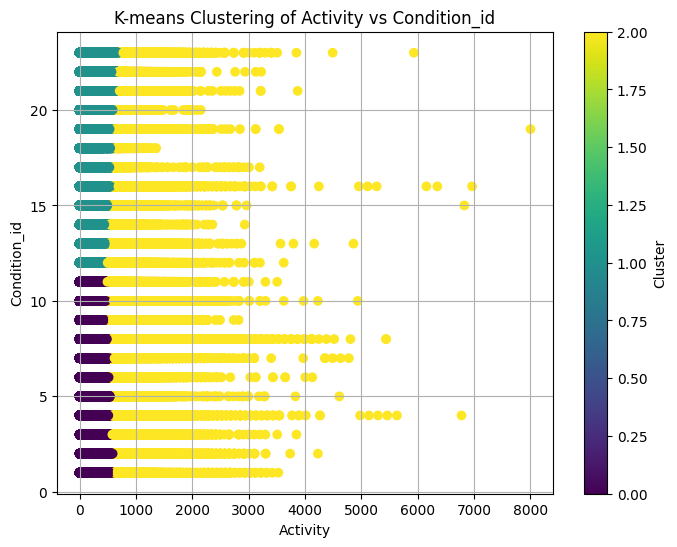

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['activity'], merged_df['condition_id'], c=merged_df['cluster'], cmap='viridis')
plt.xlabel('Activity')
plt.ylabel('Condition_id')
plt.title('K-means Clustering of Activity vs Condition_id')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

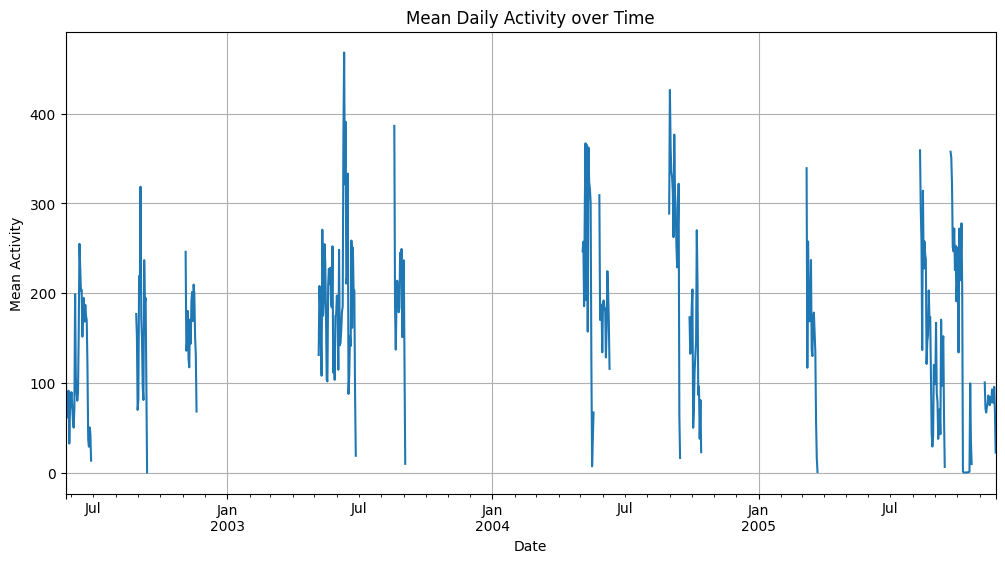

In [ ]:
# Assuming 'timestamp' and 'activity_level' are relevant columns in merged_df

# Convert 'timestamp' column to datetime type
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Set 'timestamp' column as the index
merged_df.set_index('timestamp', inplace=True)

# Resample the data to a specific frequency (e.g., daily, weekly) and aggregate activity levels
resampled_df = merged_df['activity'].resample('D').mean()  # Resample to daily frequency and calculate mean activity level

# Plot the time series
plt.figure(figsize=(12, 6))
resampled_df.plot()
plt.xlabel('Date')
plt.ylabel('Mean Activity')
plt.title('Mean Daily Activity over Time')
plt.grid(True)
plt.show()


In [ ]:
correlation = merged_df['activity'].corr(merged_df['condition_id'])

print("Correlation between activity and condition_id:", correlation)




Correlation between activity and condition_id: -0.09031706863085888


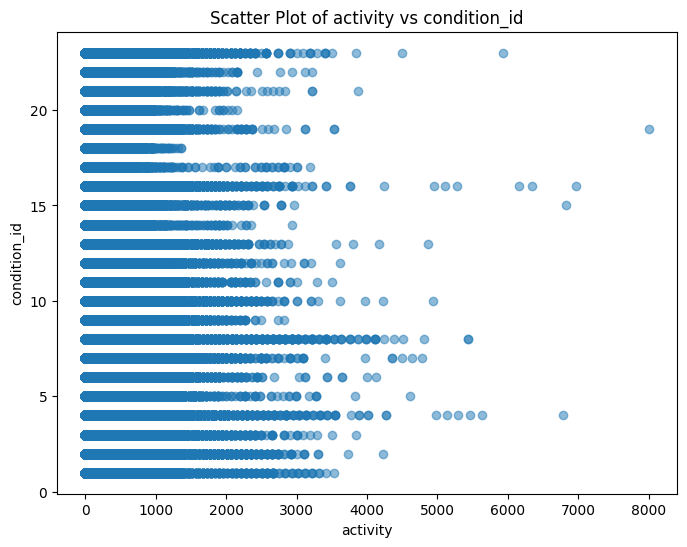

In [ ]:
# Scatter plot of 'activity' versus 'condition_id'
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['activity'], merged_df['condition_id'], alpha=0.5)
plt.title('Scatter Plot of activity vs condition_id')
plt.xlabel('activity')
plt.ylabel('condition_id')
plt.show()


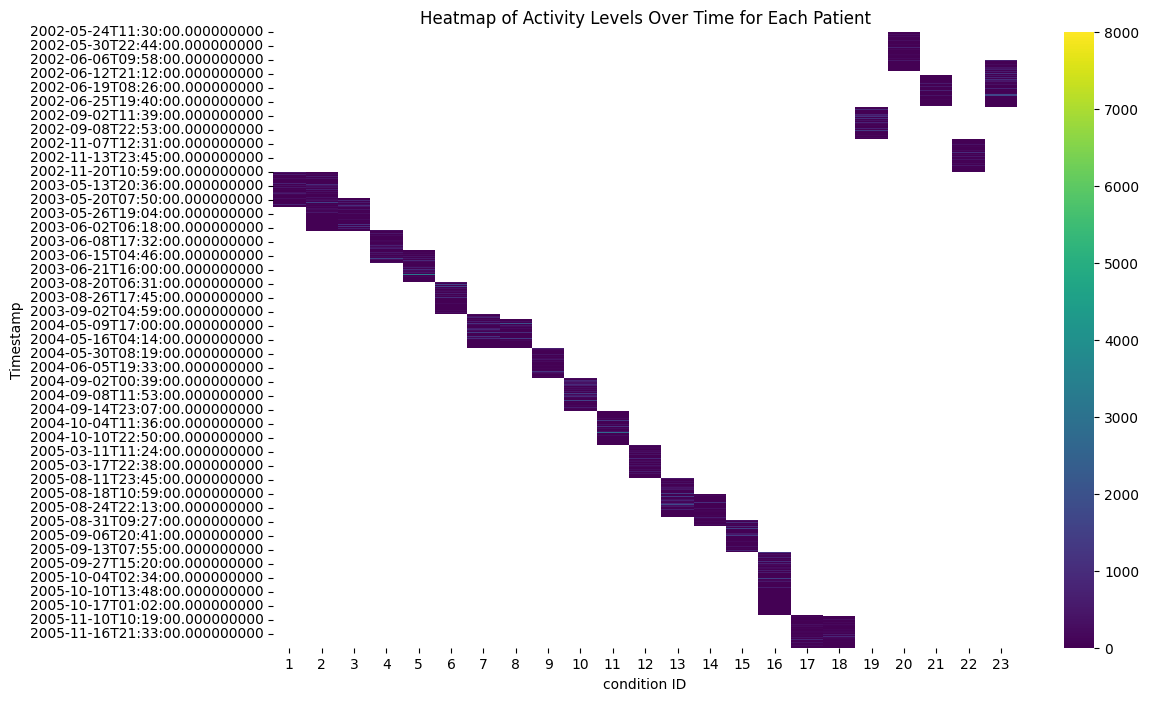

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'timestamp', 'activity_level', and 'patient_id' are relevant columns in merged_df

# Pivot the DataFrame to have 'timestamp' as rows, 'patient_id' as columns, and 'activity_level' as values
pivot_df = merged_df.pivot_table(index='timestamp', columns='condition_id', values='activity')

# Draw heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, cmap='viridis')
plt.xlabel('condition ID')
plt.ylabel('Timestamp')
plt.title('Heatmap of Activity Levels Over Time for Each Patient')
plt.show()


In [ ]:
df=pd.read_csv('/content/scores.csv')

In [ ]:
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [ ]:
df.head(10)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


In [ ]:
df.tail(10)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
45,control_23,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
46,control_24,13,2,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
47,control_25,13,1,65-69,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
48,control_26,13,1,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
49,control_27,13,2,50-54,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
50,control_28,16,2,45-49,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
51,control_29,13,2,50-54,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
52,control_30,9,2,35-39,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
53,control_31,13,1,20-24,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
54,control_32,14,2,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

number        0
days          0
gender        0
age           0
afftype      32
melanch      35
inpatient    32
edu           2
marriage     32
work         32
madrs1       32
madrs2       32
dtype: int64

In [ ]:
df.dropna()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
9,condition_10,9,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0
10,condition_11,14,1,45-49,2.0,2.0,2.0,6-10,1.0,2.0,24.0,24.0
11,condition_12,12,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,25.0,21.0
12,condition_13,14,2,35-39,1.0,2.0,2.0,11-15,2.0,2.0,18.0,13.0


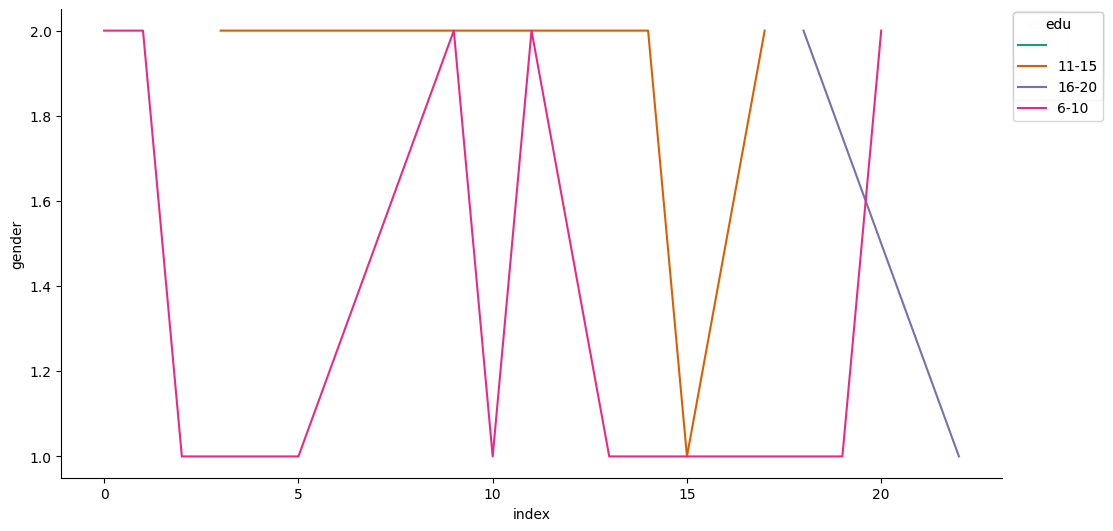

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['gender']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('edu')):
  _plot_series(series, series_name, i)
  fig.legend(title='edu', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('gender')

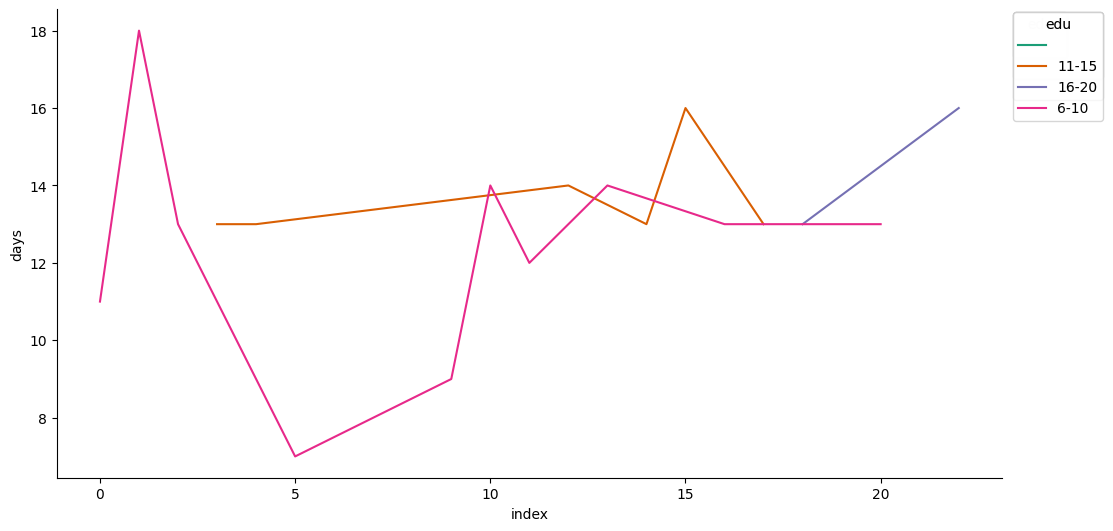

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['days']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('edu')):
  _plot_series(series, series_name, i)
  fig.legend(title='edu', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('days')

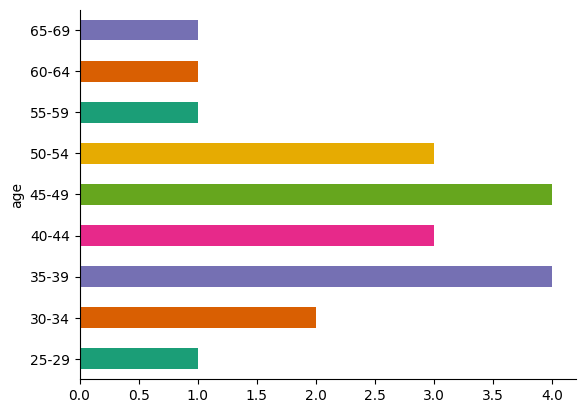

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('age').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)